# PhysiCell 2021 Virtual Workshop and Hackathon
## Session 2: PhysiCell First Dive
* Refresher: Sample and Template Projects 
* Refresher: Project Structure
* Cells, Phenotype, and Cell Defintions
* Learn about general modeling workflow
  * Basic 	(Sessions 1, 2)
  * Intermediate 	(Session 5)
  * Full 	(Sessions 6-12)
* Populate, build, and run a basic model (Basic Workflow)
* Load and visualize data in Python

### Code Section 1

In [1]:
#  add Python-loader repo to the path 
import sys
sys.path.insert(0, '../../python-loader/')
from pyMCDS import pyMCDS

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Type pyMCDS. and hit the tab key to see methods 

!ls ./output/*.xml 

./output/PhysiCell_settings.xml ./output/output00000011.xml
./output/final.xml              ./output/output00000012.xml
./output/initial.xml            ./output/output00000013.xml
./output/output00000000.xml     ./output/output00000014.xml
./output/output00000001.xml     ./output/output00000015.xml
./output/output00000002.xml     ./output/output00000016.xml
./output/output00000003.xml     ./output/output00000017.xml
./output/output00000004.xml     ./output/output00000018.xml
./output/output00000005.xml     ./output/output00000019.xml
./output/output00000006.xml     ./output/output00000020.xml
./output/output00000007.xml     ./output/output00000021.xml
./output/output00000008.xml     ./output/output00000022.xml
./output/output00000009.xml     ./output/output00000023.xml
./output/output00000010.xml     ./output/output00000024.xml


### Code Section 2

In [3]:
mcds = pyMCDS('output00000024.xml', 'output')

Reading output/output00000024.xml
Reading output/initial_mesh0.mat
Reading output/output00000024_microenvironment0.mat
Parsing PI data
Parsing AI data
working on discrete cell data...

Reading output/output00000024_cells.mat


In [4]:
print(mcds.get_time())  # what simulation time is saved here? 
print(mcds.get_cell_variables()) # what data are saved in the cells? 
print(mcds.get_substrate_names())  # what diffusing substrates? 

1440.0
['ID', 'position_x', 'position_y', 'position_z', 'total_volume', 'cell_type', 'cycle_model', 'current_phase', 'elapsed_time_in_phase', 'nuclear_volume', 'cytoplasmic_volume', 'fluid_fraction', 'calcified_fraction', 'orientation_x', 'orientation_y', 'orientation_z', 'polarity', 'velocity_x', 'velocity_y', 'velocity_z', 'pressure', 'number_of_nuclei', 'damage', 'total_attack_time', 'contact_with_basement_membrane', 'current_cycle_phase_exit_rate', 'dead', 'current_death_model', 'death_rates_0', 'death_rates_1', 'cytoplasmic_biomass_change_rate', 'nuclear_biomass_change_rate', 'fluid_change_rate', 'calcification_rate', 'target_solid_cytoplasmic', 'target_solid_nuclear', 'target_fluid_fraction', 'radius', 'nuclear_radius', 'surface_area', 'cell_cell_adhesion_strength', 'cell_BM_adhesion_strength', 'cell_cell_repulsion_strength', 'cell_BM_repulsion_strength', 'cell_adhesion_affinities_0', 'cell_adhesion_affinities_1', 'cell_adhesion_affinities_2', 'cell_adhesion_affinities_3', 'cell_

In [23]:
mcds.data.keys()

dict_keys(['metadata', 'mesh', 'continuum_variables', 'discrete_cells'])

In [41]:
AI=mcds.data['continuum_variables']['AI']
print(AI['decay_rate'])
AI_conc = mcds.get_concentrations('AI')
print(AI_conc.shape)
print(mcds.get_concentrations_at(x=200, y=250, z=0))


{'value': 0.016, 'units': '1/min'}
(75, 75, 1)
[0.55135423 0.39746655]


### Code Section 3

In [31]:
np.mean( mcds.data['continuum_variables']['AI'] )

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

In [ ]:
import matplotlib 

%matplotlib qt 

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

plt.hist( mcds.data['discrete_cells']['oncoprotein'] )


### Code Section 4

In [5]:
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']

(-500.0, 500.0, -500.0, 500.0)

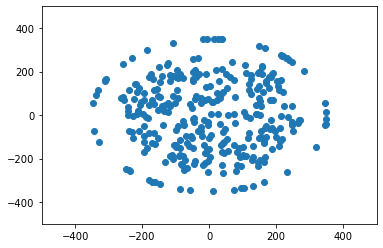

In [28]:
plt.clf()
plt.scatter(cx,cy)
plt.axis([-500,500,-500,500])

### Code Section 5

In [ ]:
plt.clf()
plt.scatter( cx , cy, c=op, s=30 )

plt.axis( 'image' )
plt.axis( [-250,250,-250,250] )

plt.colorbar()

plt.title( 'Cells colored by oncoprotein value' , size=20)
plt.xlabel( 'x' , size=15 ) 
plt.ylabel( 'y', size=15 )

### Code Section 6

In [ ]:
mcds = pyMCDS('output00000006.xml', 'output')
t=mcds.get_time()
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
op = mcds.data['discrete_cells']['oncoprotein']
plt.clf()
plt.hist( op ) 
plt.title( 'oncoprotein at t=' + \
str(t/60) + ' hours' , size=20)

### Code Section 7 

In [25]:
cell_df = mcds.get_cell_df() 
cell_df[:10]


,ID,position_x,position_y,position_z,total_volume,cell_type,cycle_model,current_phase,elapsed_time_in_phase,nuclear_volume,...,fusion_rates_1,fusion_rates_2,fusion_rates_3,fusion_rates_4,transformation_rates_0,transformation_rates_1,transformation_rates_2,transformation_rates_3,transformation_rates_4,sample
0,621.0,-60.147680,130.878286,0.0,1000.000000,2.0,5.0,14.0,204.0,540.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
1,487.0,-29.402090,-36.329676,0.0,1000.000000,2.0,5.0,14.0,156.0,540.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
2,708.0,-166.741754,230.899160,0.0,927.988713,1.0,5.0,14.0,492.0,507.864473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000547,0.0,0.0,1.0
3,643.0,-238.287947,-9.249352,0.0,7.351470,0.0,100.0,100.0,450.0,7.150941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
4,616.0,-248.047675,76.836857,0.0,728.571866,1.0,5.0,14.0,228.0,405.908832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000402,0.0,0.0,1.0
5,396.0,265.553636,109.882365,0.0,1000.000000,2.0,5.0,14.0,366.0,540.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
6,725.0,-8.092607,7.446138,0.0,912.774130,1.0,5.0,14.0,468.0,500.932298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000785,0.0,0.0,1.0
7,964.0,245.784567,176.637818,0.0,383.762417,2.0,5.0,14.0,36.0,215.614390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
8,367.0,-88.045385,-82.870043,0.0,933.721148,1.0,5.0,14.0,480.0,510.015531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000550,0.0,0.0,1.0
9,675.0,162.758870,106.807035,0.0,930.332382,2.0,5.0,14.0,540.0,509.444573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0


In [46]:
TU_df=cell_df.loc[cell_df['cell_type'] == 2]
print(TU_df.loc[TU_df['cycle_model']==5.0])

          ID  position_x  position_y  position_z  total_volume  cell_type  \
0      621.0  -60.147680  130.878286         0.0   1000.000000        2.0   
1      487.0  -29.402090  -36.329676         0.0   1000.000000        2.0   
5      396.0  265.553636  109.882365         0.0   1000.000000        2.0   
7      964.0  245.784567  176.637818         0.0    383.762417        2.0   
9      675.0  162.758870  106.807035         0.0    930.332382        2.0   
...      ...         ...         ...         ...           ...        ...   
1026  1285.0  -93.609103   17.060844         0.0    470.971642        2.0   
1027  1286.0  -42.902617  244.070165         0.0    493.053724        2.0   
1029  1288.0   69.218862 -114.442850         0.0    484.928083        2.0   
1030  1289.0  143.045411  -50.389594         0.0    259.596535        2.0   
1031  1290.0  -52.959192  138.929251         0.0    459.739561        2.0   

      cycle_model  current_phase  elapsed_time_in_phase  nuclear_volume  ..

In [6]:
cycle = mcds.data['discrete_cells']['cycle_model']
cycle = cycle.astype( int ) 

live = np.argwhere( cycle < 100 ).flatten()
dead = np.argwhere( cycle >= 100 ).flatten()

print( len( live) )
print( len(dead) )

1001
33


### Code Section 8

In [7]:
# Live and dead cell counts
n_live = len( live ); print( n_live) 
n_dead = len( dead ); print( n_dead ); 

# Mean oncoprotein in live cells only 
print( np.mean( op[live] ) )


# Let's scatter plot of only live cells  
plt.clf()
plt.scatter( cx[live],cy[live],c=op[live],s=5); 
plt.colorbar()
plt.axis('image')
plt.axis([-400,400,-400,400])
plt.title( 'Live cells colored by p at t=' +str(t/60) + ' hr',size=20)

1001
33


NameError: name 'op' is not defined

### Code Section 8a

In [ ]:
ind = np.argwhere( (cycle<100) & (op>5) ) .flatten()
plt.clf()
plt.scatter( cx[ind], cy[ind], c=op[ind], s=10 )
plt.title( 'Live cells with p>5 at t='\
+str(t/60) + 'hr', size=20)
plt.axis('image')
plt.axis([-400,400,-400,400])
plt.colorbar()

### Code Section 9 

In [17]:
plt.clf()
print( mcds.get_substrate_names() ); 

['PI', 'AI']


<Figure size 432x288 with 0 Axes>

(-740.0, 740.0, -740.0, 740.0)

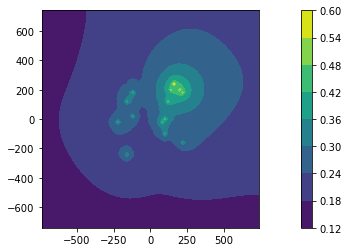

In [18]:
o2 = mcds.get_concentrations( 'AI' );
X,Y = mcds.get_2D_mesh(); 

plt.clf()
plt.contourf(X,Y,o2[:,:,0]);
plt.colorbar()
plt.axis('image')

### Code Section 10 

NameError: name 't' is not defined

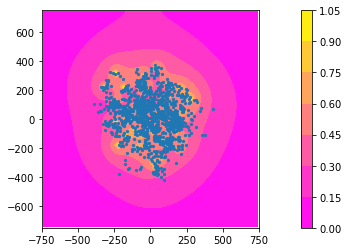

In [21]:
circle_size = 5

plt.clf()
mcds.get_substrate_names(); 

o2 = mcds.get_concentrations( 'PI' );
X,Y = mcds.get_2D_mesh(); 
plt.contourf(X,Y,o2[:,:,0],cmap='spring');
plt.colorbar()

plt.scatter( cx[live],cy[live],s=circle_size); 
plt.axis('image')
plt.axis([-750,750,-750,750])
plt.title( 'Live cells colored by p at t=' +str(t/60) + ' hr', size=20)

# let's plot dead cells as white and transparent
plt.scatter( cx[dead],cy[dead],c='w',s=circle_size, alpha=0.5 ); 

### Code Section 11

In [42]:
# Let's get live and dead cell counts, mean p (in live cells). We need to loop overall simulation times 

last_index = 6;
live_count = np.zeros( last_index+1 ); 
dead_count = np.zeros( last_index+1 );
mean_p = np.zeros( last_index+1 );
std_p = np.zeros( last_index+1 );
times = np.zeros( last_index+1 ); 
for n in range( 0,last_index+1 ):
	filename='output'+"%08i"%n+'.xml'
	mcds=pyMCDS(filename,'output')
	times[n]= mcds.get_time()
	cycle=mcds.data['discrete_cells']['cycle_model']
	live = np.argwhere(cycle<100).flatten()
	dead = np.argwhere(cycle>=100).flatten()
	live_count[n] = len(live)
	dead_count[n] = len(dead)


Reading output/output00000000.xml
Reading output/initial_mesh0.mat
Reading output/output00000000_microenvironment0.mat
Parsing PI data
Parsing AI data
working on discrete cell data...

Reading output/output00000000_cells.mat
Reading output/output00000001.xml
Reading output/initial_mesh0.mat
Reading output/output00000001_microenvironment0.mat
Parsing PI data
Parsing AI data
working on discrete cell data...

Reading output/output00000001_cells.mat
Reading output/output00000002.xml
Reading output/initial_mesh0.mat
Reading output/output00000002_microenvironment0.mat
Parsing PI data
Parsing AI data
working on discrete cell data...

Reading output/output00000002_cells.mat
Reading output/output00000003.xml
Reading output/initial_mesh0.mat
Reading output/output00000003_microenvironment0.mat
Parsing PI data
Parsing AI data
working on discrete cell data...

Reading output/output00000003_cells.mat
Reading output/output00000004.xml
Reading output/initial_mesh0.mat
Reading output/output00000004_mic

### Code Section 12

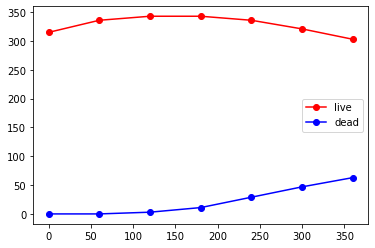

In [43]:
plt.clf()
plt.plot( times, live_count , 'r-o' )
plt.plot( times, dead_count , 'b-o' ); 
plt.legend( {'live', 'dead' } ) 

In [ ]:
poly=np.polyfit( times,np.log(live_count),1) 
print( poly[0] )
# growth rate is 0th element
# in units of 1/min 
# 0.0003373436446715521

In [ ]:
plt.clf()
plt.plot(times,mean_p);
# mean increases rapidly 
# due to selection processes


### Code Section 13

In [ ]:
n = 3
filename='output'+"%08i"%n+'.xml'
mcds=pyMCDS(filename,'output')
t = mcds.get_time()
cell_type=mcds.data['discrete_cells']['cell_type']
cell_type=cell_type.astype(int)

ind1 = np.argwhere(cell_type==1).flatten(); # director 
ind2 = np.argwhere(cell_type==2).flatten(); # cargo 
ind3 = np.argwhere(cell_type==3).flatten(); # worker 

cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']

### Code Section 14

In [ ]:
circle_size=20

plt.clf()
# plt.figure(figsize=(15,15))
plt.scatter(cx[ind1],cy[ind1],c='g',s=circle_size) 
plt.scatter(cx[ind2],cy[ind2],c='b',s=circle_size) 
plt.scatter(cx[ind3],cy[ind3],c='r',s=circle_size) 
plt.axis('square');

### Code Section 15

In [ ]:
mcds.get_substrate_names(); 

cs = mcds.get_concentrations( 'cargo signal' );
X,Y = mcds.get_2D_mesh(); 

plt.clf()
# plt.figure(figsize=(15,15))
plt.contourf(X,Y,cs[:,:,0],cmap='gray');

plt.scatter(cx[ind1],cy[ind1],c='g',s=circle_size) 
plt.scatter(cx[ind2],cy[ind2],c='b',s=circle_size) 
plt.scatter(cx[ind3],cy[ind3],c='r',s=circle_size) 
plt.axis('square');